<a href="https://colab.research.google.com/github/orifelszer/CrimeData/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!git clone https://github.com/orifelszer/CrimeData.git

import os
import zipfile
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

Cloning into 'CrimeData'...
remote: Enumerating objects: 892, done.
remote: Counting objects: 100% (333/333), done.
remote: Compressing objects: 100% (187/187), done.
remote: Total 892 (delta 257), reused 146 (delta 146), pack-reused 559 (from 1)
Receiving objects: 100% (892/892), 298.58 MiB | 35.91 MiB/s, done.
Resolving deltas: 100% (471/471), done.


In [16]:
# Folder containing your zip files
zip_folder = 'CrimeData'

# List of relevant zip files to extract (2019 to 2024 only)
relevant_zip_files = [
    f for f in os.listdir(zip_folder)
    if f.startswith('crimes') and f.endswith('.zip') and any(year in f for year in ['2019', '2020', '2021', '2022', '2023', '2024'])
]

# List to store combined data
combined_data = []

In [17]:
for zip_file in relevant_zip_files:
    zip_path = os.path.join(zip_folder, zip_file)
    extract_path = os.path.join(zip_folder, zip_file.replace('.zip', ''))

    # Extract files from the zip archive
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
        print(f"Extracted: {zip_file} -> {extract_path}")

Extracted: crimes2020.zip -> CrimeData/crimes2020
Extracted: crimes2023.zip -> CrimeData/crimes2023
Extracted: crimes2024.zip -> CrimeData/crimes2024
Extracted: crimes2019.zip -> CrimeData/crimes2019
Extracted: crimes2021.zip -> CrimeData/crimes2021
Extracted: crimes2022.zip -> CrimeData/crimes2022


In [21]:
# Find CSV files in the extracted directory
csv_files = [f for f in os.listdir(extract_path) if f.endswith('.csv')]

    # Read and append the data from each CSV file
for csv_file in csv_files:
    csv_path = os.path.join(extract_path, csv_file)
    df = pd.read_csv(csv_path)
    combined_data.append(df)

In [22]:
# Combine all data into a single DataFrame
combined_data = pd.concat(combined_data, ignore_index=True)

In [23]:
# מבנה הנתונים
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415022 entries, 0 to 415021
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   FictiveIDNumber    415022 non-null  object 
 1   Year               415022 non-null  int64  
 2   Quarter            415022 non-null  object 
 3   YeshuvKod          358482 non-null  float64
 4   Yeshuv             358482 non-null  object 
 5   PoliceDistrictKod  415022 non-null  int64  
 6   PoliceDistrict     415022 non-null  object 
 7   PoliceMerhavKod    415022 non-null  int64  
 8   PoliceMerhav       415022 non-null  object 
 9   PoliceStationKod   415022 non-null  int64  
 10  PoliceStation      415022 non-null  object 
 11  municipalKod       31329 non-null   float64
 12  municipalName      60267 non-null   object 
 13  StatisticAreaKod   259638 non-null  float64
 14  StatisticArea      242731 non-null  object 
 15  StatisticGroupKod  415022 non-null  int64  
 16  St

Given the large size of our dataset, optimizing data types is crucial for improving performance and reducing memory usage. Specifically, we will convert float64 and object columns to more efficient data types, which will save space and allow the code to execute faster.

In [24]:
# תיאור סטטיסטי של הנתונים
combined_data.describe()

,Year,YeshuvKod,PoliceDistrictKod,PoliceMerhavKod,PoliceStationKod,municipalKod,StatisticAreaKod,StatisticGroupKod,StatisticTypeKod
count,415022.0,358482.000000,4.150220e+05,4.150220e+05,4.150220e+05,31329.000000,2.596380e+05,415022.000000,415022.000000
mean,2022.0,4718.254356,3.931370e+07,3.185725e+07,3.709097e+07,35.806824,5.350489e+07,542.736103,552.702387
std,0.0,2941.573148,2.204059e+07,1.557895e+07,2.153354e+07,25.494609,2.745319e+07,898.877967,901.139491
min,2022.0,26.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,3.100010e+05,-1.000000,-1.000000
25%,2022.0,2600.000000,2.000000e+07,1.500522e+07,1.500571e+07,15.000000,3.000102e+07,200.000000,212.000000
50%,2022.0,5000.000000,4.000000e+07,3.120000e+07,3.131300e+07,30.000000,5.000094e+07,400.000000,404.000000
75%,2022.0,7400.000000,5.000000e+07,4.120000e+07,5.121000e+07,54.000000,7.900011e+07,700.000000,715.000000
max,2022.0,9800.000000,8.000000e+07,7.150000e+07,8.170000e+07,100.000000,9.800000e+07,10000.000000,10039.000000


In [25]:
# בדיקת הערכים החסרים
missing_values = combined_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 FictiveIDNumber           0
Year                      0
Quarter                   0
YeshuvKod             56540
Yeshuv                56540
PoliceDistrictKod         0
PoliceDistrict            0
PoliceMerhavKod           0
PoliceMerhav              0
PoliceStationKod          0
PoliceStation             0
municipalKod         383693
municipalName        354755
StatisticAreaKod     155384
StatisticArea        172291
StatisticGroupKod         0
StatisticGroup            0
StatisticTypeKod          0
StatisticType             0
dtype: int64


<Figure size 1000x600 with 0 Axes>

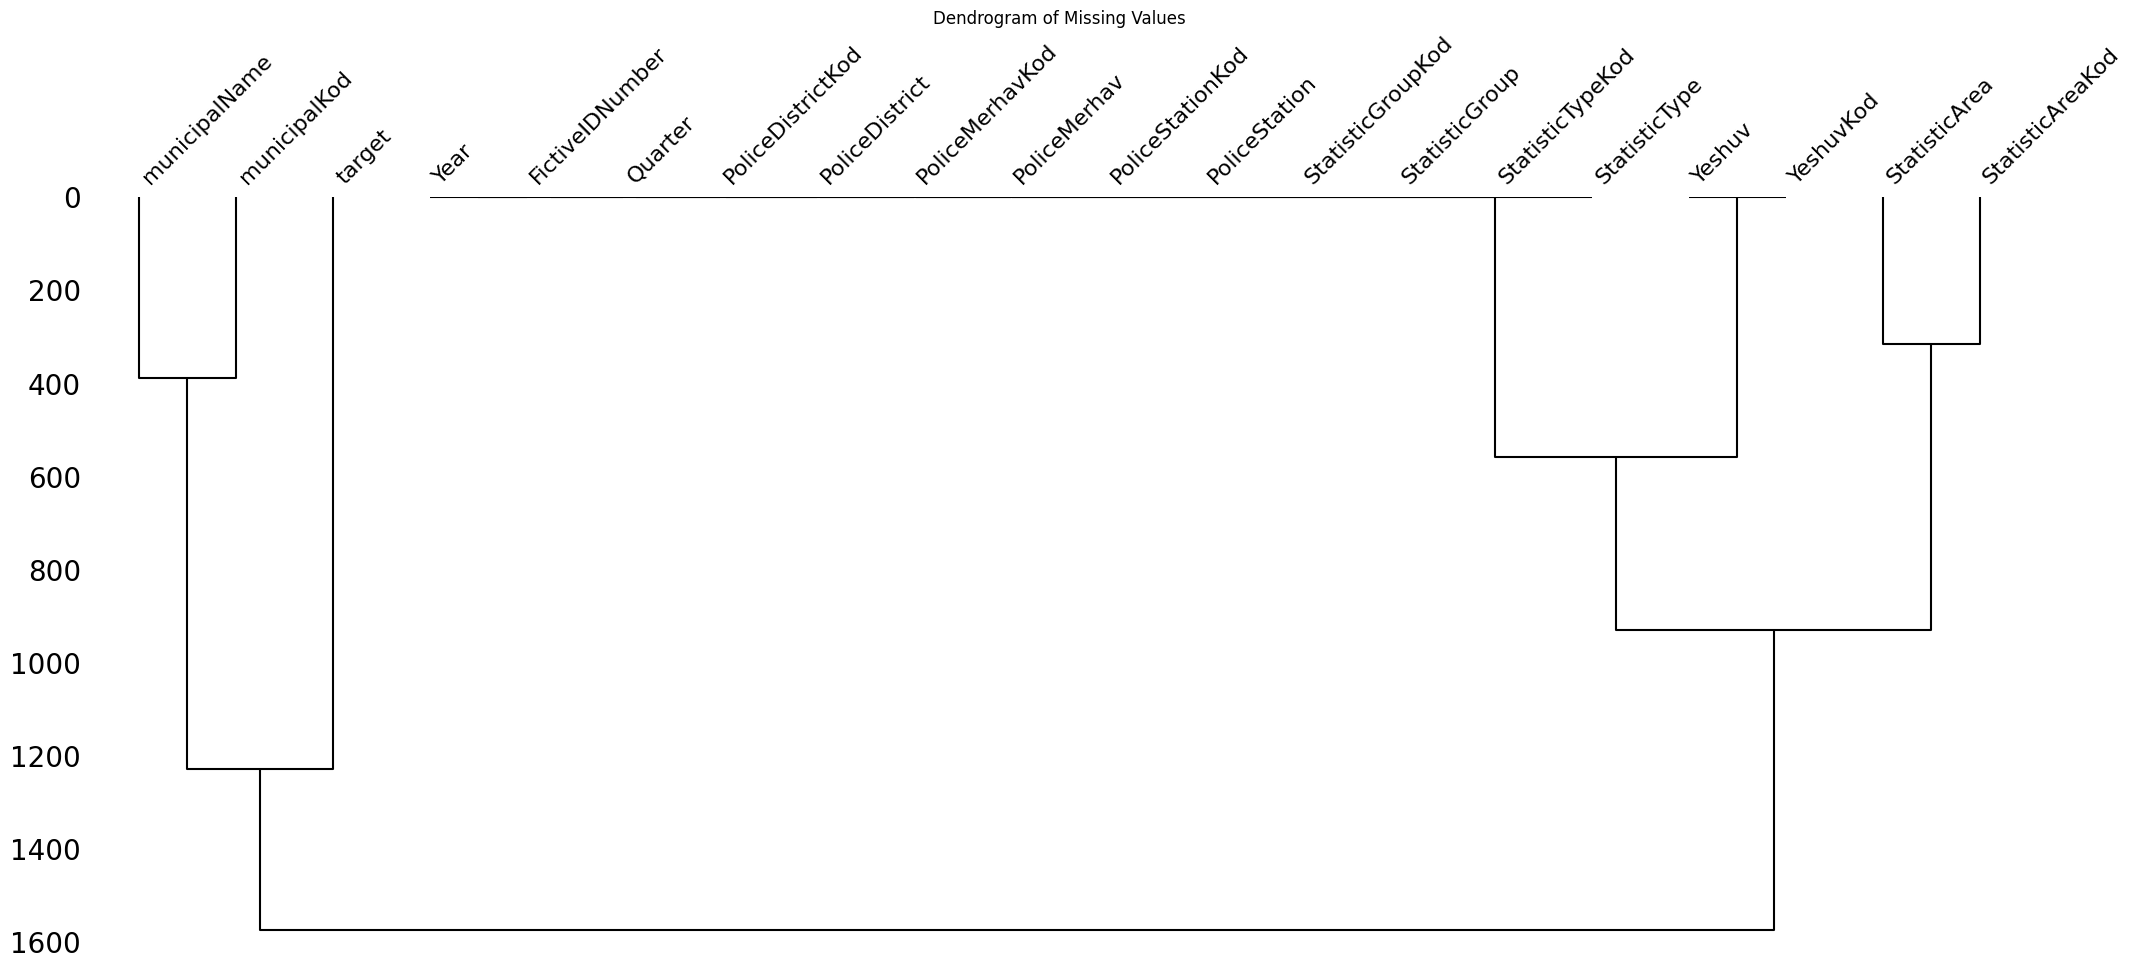

In [ ]:


# Adjusting the size of the dendrogram for a smaller display
plt.figure(figsize=(10, 6))  # Reduced width and height
msno.dendrogram(combined_data)
plt.title('Dendrogram of Missing Values')
plt.show()



The dendrogram visualizes the distance or dissimilarity between the missing data patterns across columns. For example:

*   municipalName and municipalKod are clustered together, indicating similar missing data patterns.
*   StatisticType, StatisticTypeKod, Yeshuv, and YeshuvKod also form a group, suggesting similar patterns of missingness. This visualization is helpful for identifying relationships in missing data and deciding on appropriate strategies for handling it.




After exploring the structure and missing data in our dataset, we now turn to examine the geographical distribution of the data.

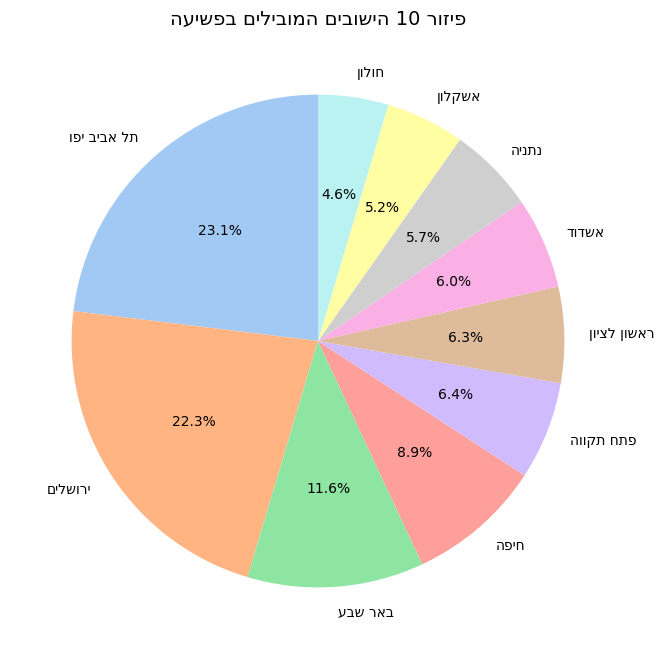

In [26]:
# Reverse Hebrew text for the pie chart labels
def reverse_hebrew_text(text):
    return text[::-1] if isinstance(text, str) else text

# Reverse the labels in the 'Yeshuv' column so it fits the Hebrew RTL
if 'Yeshuv' in combined_data.columns:
    combined_data['Yeshuv'] = combined_data['Yeshuv'].apply(reverse_hebrew_text)

    # Calculate the top 10 Yeshuv by count
    top_yeshuv = combined_data['Yeshuv'].value_counts().head(10)

    # Create a pie chart for the top 10 Yeshuv
    plt.figure(figsize=(8, 8))
    top_yeshuv.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title(reverse_hebrew_text('פיזור 01 הישובים המובילים בפשיעה'), fontsize=14)
    plt.ylabel('')
    plt.show()
else:
    print("The 'Yeshuv' column does not exist in the dataset.")


The geographical analysis shows that Tel Aviv (תל אביב יפו) and Jerusalem (ירושלים) account for the largest shares in the dataset. Other notable settlements, such as Ashdod (אשדוד), Be'er Sheva (באר שבע), and Holon (חולון), also make significant contributions, though to a lesser extent.

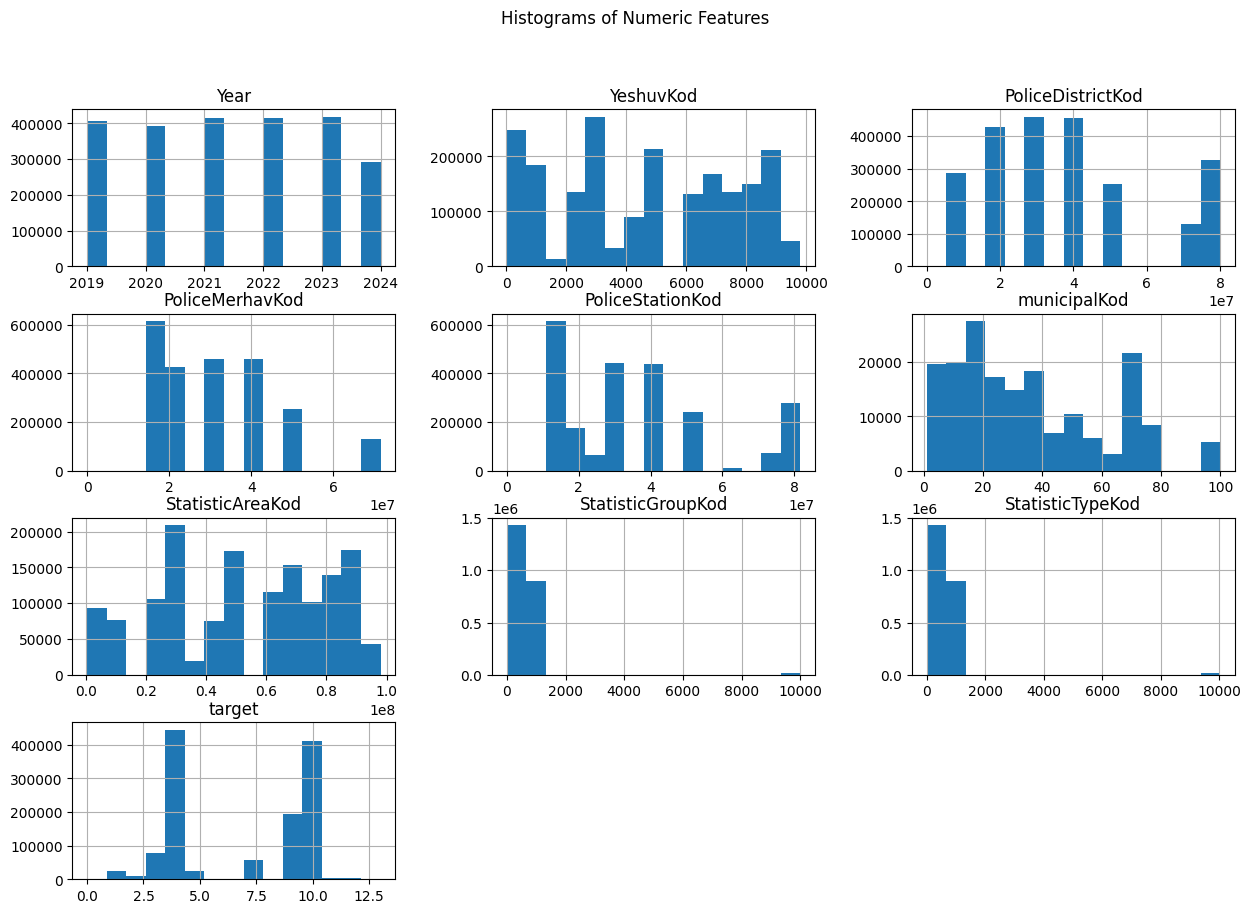

In [ ]:
# התפלגות משתנים מספריים
numeric_features = combined_data.select_dtypes(include=['int64', 'float64']).columns

# יצירת היסטוגרמות
combined_data[numeric_features].hist(bins=15, figsize=(15, 10))
plt.suptitle("Histograms of Numeric Features")
plt.show()



The yearly distribution of data appears relatively balanced, with a slight dip in records for 2024. This is expected since the dataset only includes data from Q1 to Q3 for that year.

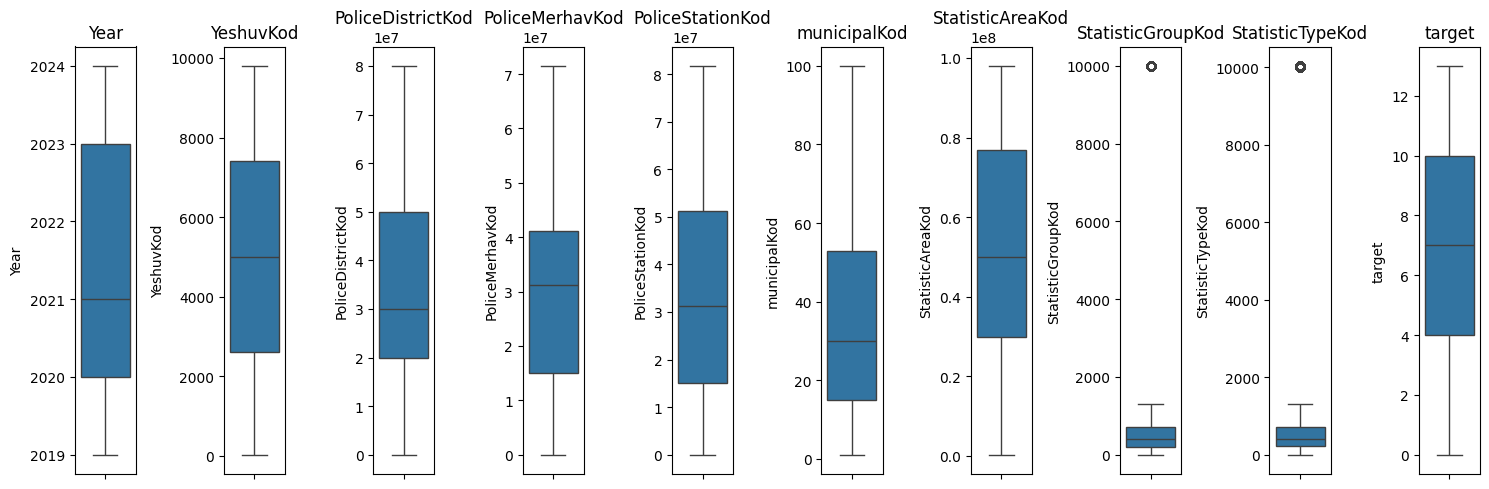

In [ ]:
# זיהוי חריגים עם Boxplot
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_features):
    plt.subplot(1, len(numeric_features), i + 1)
    sns.boxplot(y=combined_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

plt.close()

While many values are stored as floating-point numbers, they represent categorical data where each number corresponds to a specific category rather than a numerical value.

*   The Year column shows no outliers and is evenly distributed from 2019 to 2024, as expected.
*   The features StatisticGroupKod and StatisticTypeKod exhibit notable outliers. This is due to most categories being within a similar numerical range, while one of them deviate significantly (a value of 10,000).

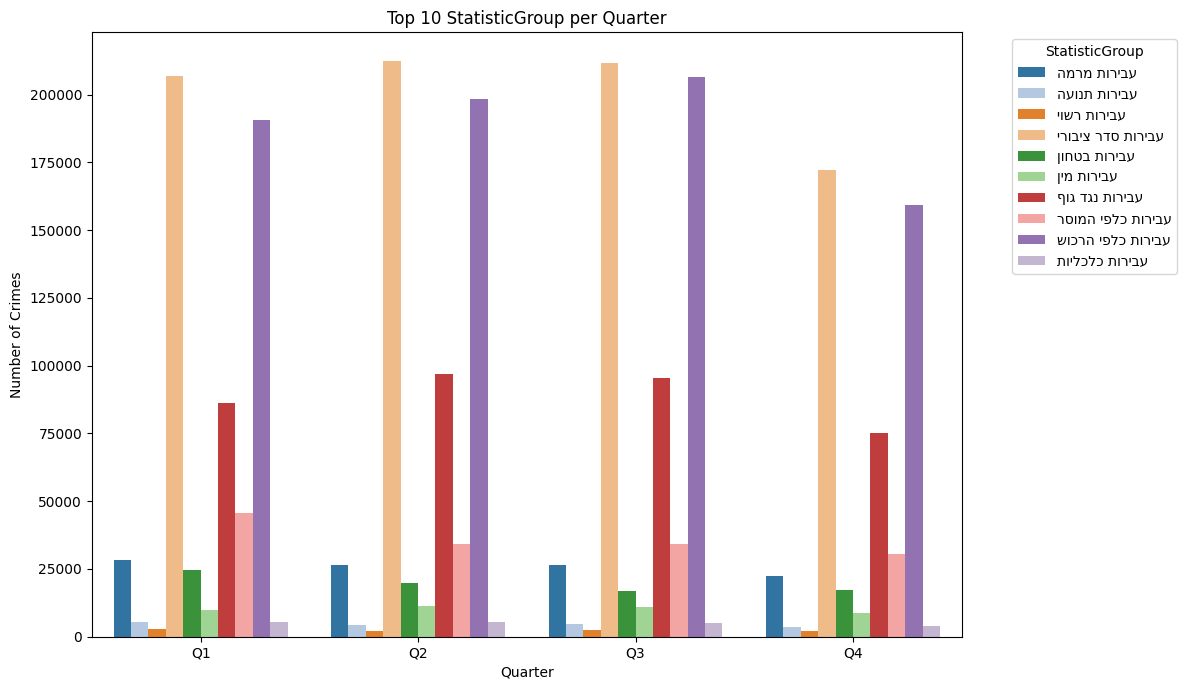

In [ ]:
# התקנת פונט עברי בגוגל קולאב (Installing Hebrew fonts in Google Colab)
!apt-get install -y fonts-freefont-ttf > /dev/null 2>&1  # Suppress warnings and messages

# Reverse Hebrew text for the 'StatisticType' column
def reverse_hebrew_text(text):
    return text[::-1] if isinstance(text, str) else text  # Reverse strings only

# Find the top N StatisticType categories by count
top_N = 10  # Adjust N as needed
top_types = combined_data['StatisticGroup'].value_counts().head(top_N).index

# Filter the DataFrame to include only these top categories
filtered_df = combined_data[combined_data['StatisticGroup'].isin(top_types)].copy()

# Apply the reverse function only to the 'StatisticType' column
filtered_df['StatisticGroup'] = filtered_df['StatisticGroup'].apply(reverse_hebrew_text)

# Group data by quarter and StatisticType
crime_grouped = filtered_df.groupby(['Quarter', 'StatisticGroup']).size().reset_index(name='count')

# Plot the data
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'

plt.figure(figsize=(12, 7))
sns.barplot(data=crime_grouped, x='Quarter', y='count', hue='StatisticGroup', palette='tab20')

# Add labels and titles
plt.xlabel('Quarter')
plt.ylabel('Number of Crimes')
plt.title(f'Top {top_N} StatisticGroup per Quarter')
plt.legend(title='StatisticGroup', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.close()


The analysis of the top 10 StatisticGroup categories per quarter highlights some key trends. Two categories, עבירות סדר ציבורי (Public Order Offenses) and עבירות כלכליות (Economic Offenses), dominate the dataset, consistently reporting the highest number of crimes across all four quarters. In contrast, categories like עבירות נגד גוף (Offenses Against the Body) and עבירות מין (Sexual Offenses) contribute significantly fewer crimes.

Overall, the number of crimes for most categories remains stable across quarters, indicating no significant seasonal variation in crime numbers.

# **Supervised Models Conclusion**

In [ ]:
# Define the metrics for each model
metrics = {
    "Baseline Model": {
        "Accuracy": 0.001,
        "Precision": 0.000001,
        "Recall": 0.001,
        "F1 Score": 0.000002
    },
    "Decision Tree": {
        "Accuracy": 0.043,
        "Precision": 0.279,
        "Recall": 0.043,
        "F1 Score": 0.048
    },
    "DNN": {
        "Accuracy": 0.356,
        "Precision": 0.239,
        "Recall": 0.356,
        "F1 Score": 0.247
    },
    "Random Forest": {
        "Accuracy": 0.048,
        "Precision": 0.300,
        "Recall": 0.048,
        "F1 Score": 0.070
    },
    "LightGBM": {
        "Accuracy": 0.116,
        "Precision": 0.302,
        "Recall": 0.116,
        "F1 Score": 0.137
    },
    "XGBoost": {
        "Accuracy": 0.382,
        "Precision": 0.352,
        "Recall": 0.382,
        "F1 Score": 0.314
    }
}


In [ ]:
# Create a DataFrame from the metrics dictionary
df_metrics = pd.DataFrame(metrics).T

# Sort the DataFrame by the 'Accuracy' column in descending order
df_metrics_sorted = df_metrics.sort_values(by='Accuracy', ascending=False)

# Print the sorted comparison table
print(df_metrics_sorted)

# Optionally, save the sorted comparison table to a CSV file
df_metrics_sorted.to_csv("sorted_model_comparison_table.csv", index=True)

                Accuracy  Precision  Recall  F1 Score
XGBoost            0.382   0.352000   0.382  0.314000
DNN                0.356   0.239000   0.356  0.247000
LightGBM           0.116   0.302000   0.116  0.137000
Random Forest      0.048   0.300000   0.048  0.070000
Decision Tree      0.043   0.279000   0.043  0.048000
Baseline Model     0.001   0.000001   0.001  0.000002


The XGBoost model outperforms all other models in terms of accuracy, precision, recall, and F1 score. It should be the preferred choice for this task.

DNN Performance: The Deep Neural Network also performs well and could be considered as an alternative to XGBoost if further improvements are made.

Tree-Based Models: The Decision Tree and Random Forest models perform poorly, indicating that they might not handle the complexity of the data well.

LightGBM: While better than the Random Forest, LightGBM still lags behind the XGBoost and DNN models.